In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Due to the problem's nature, try to create features that give an idea of the location 
# of passengers during the abnormality

df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")


print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)
print(df_train.columns)
print()
null_values_per_column = df_train.isnull().sum()
print(null_values_per_column)

print()
print(df_train.describe())
print()

print()
print(df_train.dtypes)
print()
# HomePlanet Feature
print("HomePlanet uniques:", df_train["HomePlanet"].unique())
n_HomePlanet_uniques = df_train["HomePlanet"].unique().shape[0]
print("HomePlanet unique count:", n_HomePlanet_uniques)

# Cabin Feature
print("Cabin uniques:", df_train["Cabin"].unique())
n_Cabin_uniques = df_train["Cabin"].unique().shape[0]
print("Cabin unique count:", n_Cabin_uniques)

# Destination Feature
print("Destination uniques:", df_train["Destination"].unique())
n_Destination_uniques = df_train["Destination"].unique().shape[0]
print("Destination unique count:", n_Destination_uniques)
print()

# Attention to 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' features,
# they looks like to have many outliers

# Null values

#df_train = df_train.dropna() # Only for now

indexes = df_train.index
n = df_train.shape[0]


Train shape: (8693, 14)
Test shape: (4277, 13)
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000

# Group Size

Size 1 | Transported Rate = 0.45244536940686786
Size 2 | Transported Rate = 0.5380499405469679
Size 3 | Transported Rate = 0.5931372549019608
Size 4 | Transported Rate = 0.6407766990291263
Size 5 | Transported Rate = 0.5924528301886792
Size 6 | Transported Rate = 0.6149425287356322
Size 7 | Transported Rate = 0.5411255411255411
Size 8 | Transported Rate = 0.3942307692307692
GroupSize
0    4805
1    3114
2     774
Name: count, dtype: int64


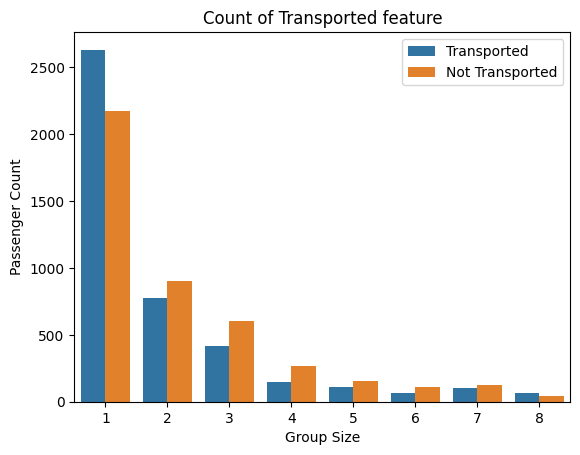

In [96]:
df_copy = df_train.copy()
df_copy["PassengerId"] = df_copy["PassengerId"].apply(lambda x: int(x[:4]))
values_frequency = df_copy["PassengerId"].value_counts()
df_copy["GroupSize"] = df_copy["PassengerId"].apply(lambda x: values_frequency.loc[x])

for i in range(1,9):
    group_i = df_copy[df_copy["GroupSize"] == i ]
    transported_i = group_i[ group_i["Transported"] == True ]
    print("Size {} | Transported Rate = {}".format( i , transported_i.shape[0] / group_i.shape[0] ))

ax = sns.countplot(x='GroupSize', hue='Transported', data=df_copy)
plt.xlabel('Group Size')
plt.ylabel('Passenger Count')
plt.legend(["Transported", "Not Transported"])
plt.title("Count of Transported feature")

def final_categories(x):
    if pd.isna(x):
        return x
        
    elif x == 1: 
        return 0 # Singular "group"

    elif x <= 4:
        return 1 # Medium group

    else:
        return 2 # Big group
        
df_train["GroupSize"] = df_copy["GroupSize"].apply(final_categories)
print(df_train["GroupSize"].value_counts())

# Family Size

Size 1 | Transported Rate = 0.5837696335078534
Size 2 | Transported Rate = 0.49375
Size 3 | Transported Rate = 0.5343642611683849
Size 4 | Transported Rate = 0.50390625
Size 5 | Transported Rate = 0.509375
Size 6 | Transported Rate = 0.49903660886319845
Size 7 | Transported Rate = 0.48139255702280914
Size 8 | Transported Rate = 0.4540441176470588
Size 9 | Transported Rate = 0.48253968253968255
Size 10 | Transported Rate = 0.51
Size 11 | Transported Rate = 0.5054545454545455
Size 12 | Transported Rate = 0.42857142857142855
Size 13 | Transported Rate = 0.46153846153846156
Size 14 | Transported Rate = 0.48214285714285715
Size 15 | Transported Rate = 0.6
Size 16 | Transported Rate = 0.375
FamilySize
1.0    3695
0.0    3626
2.0    1172
Name: count, dtype: int64


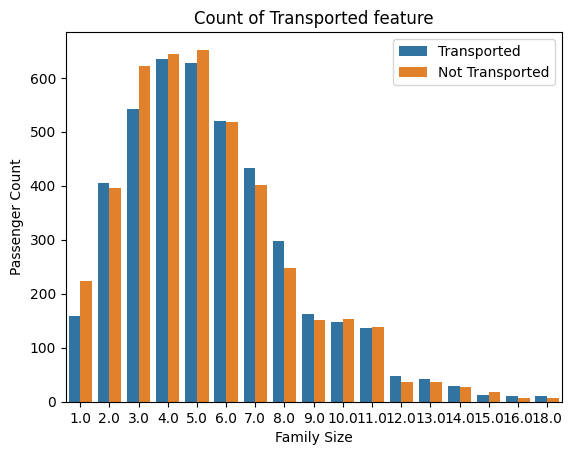

In [97]:
df_copy = df_train.copy()
df_copy["Name"] = df_copy["Name"].apply(lambda x: x.split()[-1] if type(x)==str else x)
values_frequency = df_copy["Name"].value_counts()
df_copy["FamilySize"] = df_copy["Name"].apply(lambda x: values_frequency.loc[x] if type(x)==str else x)

for i in range(1,18):
    group_i = df_copy[df_copy["FamilySize"] == i ]
    if group_i.shape[0] == 0: continue
    transported_i = group_i[ group_i["Transported"] == True ]
    print("Size {} | Transported Rate = {}".format( i , transported_i.shape[0] / group_i.shape[0] ))

ax = sns.countplot(x='FamilySize', hue='Transported', data=df_copy)
plt.xlabel('Family Size')
plt.ylabel('Passenger Count')
plt.legend(["Transported", "Not Transported"])
plt.title("Count of Transported feature")

def final_categories(x):
    if pd.isna(x):
        return x
        
    elif x <= 4: 
        return 0 # Small family

    elif x <= 8:
        return 1 # Medium family

    else:
        return 2 # Big family
        
df_train["FamilySize"] = df_copy["FamilySize"].apply(final_categories)
print(df_train["FamilySize"].value_counts())

# Analysing: HomePlanet and Destination 

In [98]:
df_copy = df_train.copy()

for home_name in df_copy["HomePlanet"].unique():
    if type(home_name) != str: continue
    df_ishome = df_copy["HomePlanet"] == home_name
    df_train[home_name] = df_ishome
    n_transported = (df_copy[df_ishome]["Transported"]==True).sum()
    print("Home: {}, Transported Rate: {}".format(home_name, n_transported/n))

for destination_name in df_copy["Destination"].unique():
    if type(destination_name) != str: continue
    df_isdestination = df_copy["Destination"] == destination_name
    df_train[destination_name] = df_isdestination
    n_transported = (df_copy[df_isdestination]["Transported"]==True).sum()
    print("Home: {}, Transported Rate: {}".format(destination_name, n_transported/n))


Home: Europa, Transported Rate: 0.16150926032439894
Home: Earth, Transported Rate: 0.22443345220292188
Home: Mars, Transported Rate: 0.10583227884504774
Home: TRAPPIST-1e, Transported Rate: 0.320602783849074
Home: PSO J318.5-22, Transported Rate: 0.046129069366156676
Home: 55 Cancri e, Transported Rate: 0.12630852409985047


# Analysing: Cabin

In [99]:
df_copy = df_train.copy()
decks = (df_copy["Cabin"].apply(lambda x: x[0] if type(x)==str else x).unique())
print("Decks:")
for deck in decks:
    if type(deck) != str: continue
    df_isdeck = df_copy["Cabin"].apply(lambda x:x[0] if type(x)==str else x) == deck
    df_train["Deck_"+deck] = df_isdeck
    n_deck = df_isdeck.sum()
    n_transported = (df_copy[df_isdeck]["Transported"] == True).sum()
    print(deck, n_transported/n_deck)
    print(n_transported, n_deck)

print("Sides:")
sides = (df_copy["Cabin"].apply(lambda x: x[-1] if type(x)==str else x).unique())
for side in sides:
    if type(side) != str: continue
    df_isside = df_copy["Cabin"].apply(lambda x:x[-1] if type(x)==str else x) == side
    df_train["Side_"+side] = df_isside
    n_side = df_isside.sum()
    n_transported = (df_copy[df_isside]["Transported"] == True).sum()
    print(side, n_transported/n_side)
    print(n_transported, n_side)

df_train = df_train.drop("Deck_T", axis = 1)


Decks:
B 0.7342747111681643
572 779
F 0.43987115246957764
1229 2794
A 0.49609375
127 256
G 0.5162172723720203
1321 2559
E 0.3573059360730594
313 876
D 0.4330543933054393
207 478
C 0.6800535475234271
508 747
T 0.2
1 5
Sides:
P 0.4512601046124584
1898 4206
S 0.5550373134328358
2380 4288


# Comparing Transported and Not Transported stats

In [100]:
# Comparing Transported and Not Transported dataframes
transported_df = df_train[ df_train["Transported"] == True ]
not_transported_df = df_train[ df_train["Transported"] == False ]

transported_stats = transported_df.describe()
not_transported_stats = not_transported_df.describe()

comparing_df = pd.DataFrame()
comparing_df["T Mean"] = transported_stats.loc["mean"]
comparing_df["NT Mean"] = not_transported_stats.loc["mean"]
comparing_df["T Std"] = transported_stats.loc["std"]
comparing_df["NT Std"] = not_transported_stats.loc["std"]

print(comparing_df)

                  T Mean     NT Mean        T Std       NT Std
Age            27.748834   29.922858    15.151705    13.699262
RoomService    63.098021  389.266066   274.812497   875.638123
FoodCourt     532.691984  382.615930  1931.306995  1200.115601
ShoppingMall  179.829972  167.566217   722.026714   456.528126
Spa            61.675531  564.382666   262.682871  1551.356047
VRDeck         69.148131  543.629822   291.658171  1563.088368
GroupSize       0.601645    0.469988     0.660458     0.639248
FamilySize      0.693477    0.728890     0.693608     0.693833


# Analysing the five money features

## RoomService

count    8512.000000
mean        4.780588
std        14.185482
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       304.829787
Name: RoomService, dtype: float64
RoomService
0.0    5577
2.0    2579
1.0     356
Name: count, dtype: int64


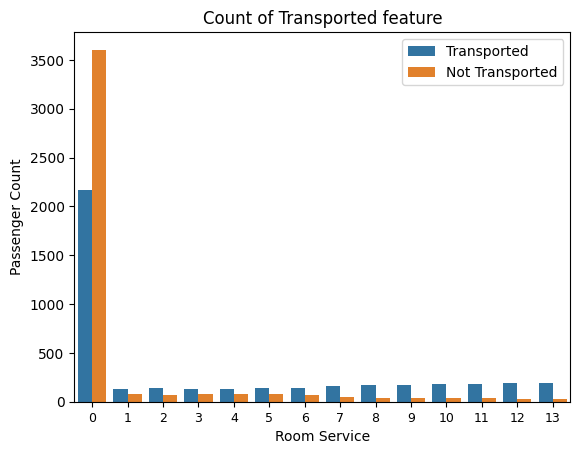

In [101]:
from sklearn.preprocessing import RobustScaler, LabelEncoder

df_copy = df_train.copy()
scaler = RobustScaler()
label_encoder = LabelEncoder()
df_copy["RoomService"] = scaler.fit_transform(np.array(df_copy["RoomService"]).reshape(-1,1))
print(df_copy["RoomService"].describe())
df_copy["RoomService"] = pd.qcut(df_copy["RoomService"], 40, duplicates = "drop")
all_intervals = df_copy["RoomService"].cat.categories


#df_copy["RoomService"] = pd.cut(df_copy["RoomService"], [-1, 0.01, 2.5, 250])

ax = sns.countplot(x='RoomService', hue='Transported', data=df_copy)
plt.xlabel('Room Service')
plt.ylabel('Passenger Count')
plt.legend(["Transported", "Not Transported"])
plt.title("Count of Transported feature")
n_intervals = all_intervals.size
ax.set_xticklabels(range(n_intervals), size = 9)

df_copy["RoomService"] = label_encoder.fit_transform(df_copy["RoomService"])
def final_categories(x):
    if pd.isna(x):
        return x
        
    elif x == 0: 
        return 0

    elif x <= 6:
        return 1

    else:
        return 2
        
df_train["RoomService"] = df_train["RoomService"].apply(final_categories)
print(df_train["RoomService"].value_counts())

## FoodCourt

count    8510.000000
mean        6.027332
std        21.203806
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       392.276316
Name: FoodCourt, dtype: float64
FoodCourt
0.0    5456
4.0    2475
1.0     482
2.0      67
3.0      30
Name: count, dtype: int64


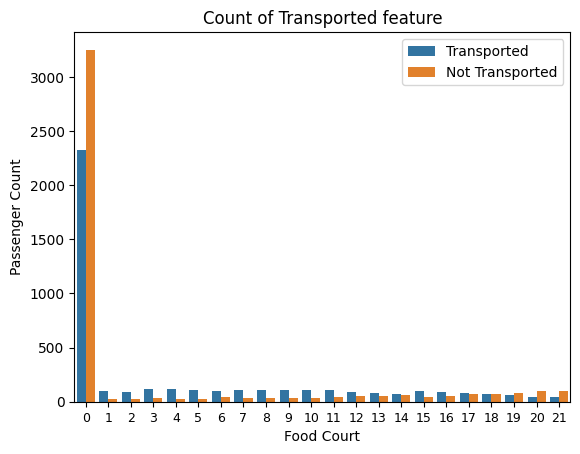

In [102]:
from sklearn.preprocessing import RobustScaler, LabelEncoder

df_copy = df_train.copy()
scaler = RobustScaler()
label_encoder = LabelEncoder()
df_copy["FoodCourt"] = scaler.fit_transform(np.array(df_copy["FoodCourt"]).reshape(-1,1))
print(df_copy["FoodCourt"].describe())
df_copy["FoodCourt"] = pd.qcut(df_copy["FoodCourt"], 60, duplicates = "drop")
all_intervals = df_copy["FoodCourt"].cat.categories



ax = sns.countplot(x='FoodCourt', hue='Transported', data=df_copy)
plt.xlabel('Food Court')
plt.ylabel('Passenger Count')
plt.legend(["Transported", "Not Transported"])
plt.title("Count of Transported feature")
n_intervals = all_intervals.size
ax.set_xticklabels(range(n_intervals), size = 9)

df_copy["FoodCourt"] = label_encoder.fit_transform(df_copy["FoodCourt"])
def final_categories(x):
    if pd.isna(x):
        return x
        
    elif x == 0: 
        return 0

    elif x <= 11:
        return 1

    elif x <= 16:
        return 2

    elif x <= 19:
        return 3
        
    else:
        return 4
        
df_train["FoodCourt"] = df_train["FoodCourt"].apply(final_categories)
print(df_train["FoodCourt"].value_counts())

## ShoppingMall  

count    8485.000000
mean        6.434414
std        22.396165
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       870.074074
Name: ShoppingMall, dtype: float64
ShoppingMall
0.0    5587
3.0    2222
1.0     613
2.0      63
Name: count, dtype: int64


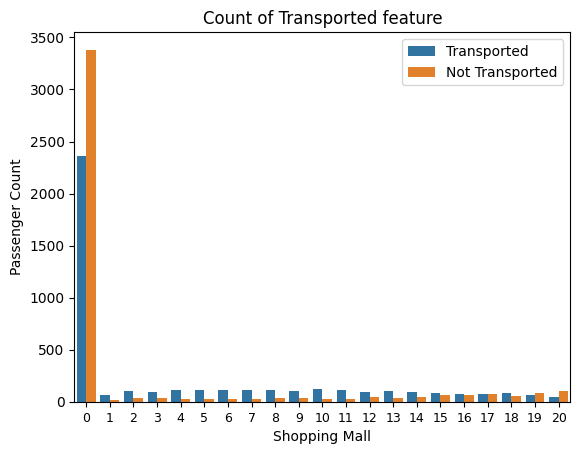

In [103]:
from sklearn.preprocessing import RobustScaler, LabelEncoder

df_copy = df_train.copy()
scaler = RobustScaler()
label_encoder = LabelEncoder()
df_copy["ShoppingMall"] = scaler.fit_transform(np.array(df_copy["ShoppingMall"]).reshape(-1,1))
print(df_copy["ShoppingMall"].describe())
df_copy["ShoppingMall"] = pd.qcut(df_copy["ShoppingMall"], 60, duplicates = "drop")
all_intervals = df_copy["ShoppingMall"].cat.categories



ax = sns.countplot(x='ShoppingMall', hue='Transported', data=df_copy)
plt.xlabel('Shopping Mall')
plt.ylabel('Passenger Count')
plt.legend(["Transported", "Not Transported"])
plt.title("Count of Transported feature")
n_intervals = all_intervals.size
ax.set_xticklabels(range(n_intervals), size = 9)

df_copy["ShoppingMall"] = label_encoder.fit_transform(df_copy["ShoppingMall"])
def final_categories(x):
    if pd.isna(x):
        return x
        
    elif x == 0: 
        return 0

    elif x <= 14:
        return 1

    elif x <= 18:
        return 2
        
    else:
        return 3
        
df_train["ShoppingMall"] = df_train["ShoppingMall"].apply(final_categories)
print(df_train["ShoppingMall"].value_counts())

## Spa

count    8510.000000
mean        5.273539
std        19.266196
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       379.796610
Name: Spa, dtype: float64
Spa
0.0    5324
4.0    2459
1.0     551
2.0      96
3.0      80
Name: count, dtype: int64


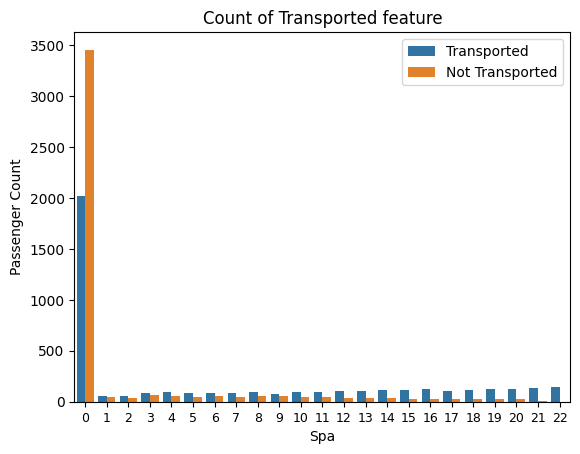

In [104]:
from sklearn.preprocessing import RobustScaler, LabelEncoder

df_copy = df_train.copy()
scaler = RobustScaler()
label_encoder = LabelEncoder()
df_copy["Spa"] = scaler.fit_transform(np.array(df_copy["Spa"]).reshape(-1,1))
print(df_copy["Spa"].describe())
df_copy["Spa"] = pd.qcut(df_copy["Spa"], 60, duplicates = "drop")
all_intervals = df_copy["Spa"].cat.categories



ax = sns.countplot(x='Spa', hue='Transported', data=df_copy)
plt.xlabel('Spa')
plt.ylabel('Passenger Count')
plt.legend(["Transported", "Not Transported"])
plt.title("Count of Transported feature")
n_intervals = all_intervals.size
ax.set_xticklabels(range(n_intervals), size = 9)

df_copy["Spa"] = label_encoder.fit_transform(df_copy["Spa"])
def final_categories(x):
    if pd.isna(x):
        return x
        
    elif x == 0: 
        return 0

    elif x <= 10:
        return 1

    elif x <= 15:
        return 2

    elif x <= 20:
        return 3
        
    else:
        return 4
        
df_train["Spa"] = df_train["Spa"].apply(final_categories)
print(df_train["Spa"].value_counts())

## VRDeck

count    8505.000000
mean        6.627278
std        24.906895
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       524.630435
Name: VRDeck, dtype: float64
VRDeck
0.0    5495
3.0    2359
1.0     572
2.0      79
Name: count, dtype: int64


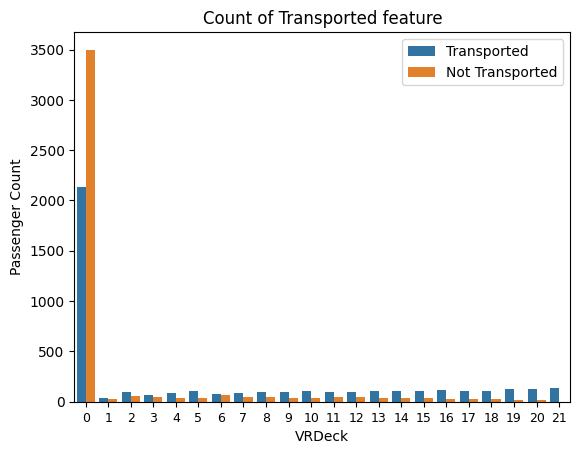

In [105]:
from sklearn.preprocessing import RobustScaler, LabelEncoder

df_copy = df_train.copy()
scaler = RobustScaler()
label_encoder = LabelEncoder()
df_copy["VRDeck"] = scaler.fit_transform(np.array(df_copy["VRDeck"]).reshape(-1,1))
print(df_copy["VRDeck"].describe())
df_copy["VRDeck"] = pd.qcut(df_copy["VRDeck"], 60, duplicates = "drop")
all_intervals = df_copy["VRDeck"].cat.categories



ax = sns.countplot(x='VRDeck', hue='Transported', data=df_copy)
plt.xlabel('VRDeck')
plt.ylabel('Passenger Count')
plt.legend(["Transported", "Not Transported"])
plt.title("Count of Transported feature")
n_intervals = all_intervals.size
ax.set_xticklabels(range(n_intervals), size = 9)

df_copy["VRDeck"] = label_encoder.fit_transform(df_copy["VRDeck"])
def final_categories(x):
    if pd.isna(x):
        return x
        
    elif x == 0: 
        return 0

    elif x <= 14:
        return 1

    elif x <= 19:
        return 2
        
    else:
        return 3
        
df_train["VRDeck"] = df_train["VRDeck"].apply(final_categories)
print(df_train["VRDeck"].value_counts())

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'GroupSize', 'FamilySize', 'Europa',
       'Earth', 'Mars', 'TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e',
       'Deck_B', 'Deck_F', 'Deck_A', 'Deck_G', 'Deck_E', 'Deck_D', 'Deck_C',
       'Side_P', 'Side_S'],
      dtype='object')

Transported      1.000000
CryoSleep        0.468645
Europa           0.176916
Deck_B           0.144733
55 Cancri e      0.108722
Deck_C           0.108193
Side_S           0.101455
GroupSize        0.100765
Mars             0.019544
Deck_G           0.016269
PSO J318.5-22    0.000092
Deck_A          -0.002623
FamilySize      -0.025518
Deck_D          -0.034046
VIP             -0.037650
Age             -0.075026
Deck_F          -0.087753
TRAPPIST-1e     -0.094700
Deck_E          -0.097965
Side_P          -0.101397
Earth           -0.169019
FoodCourt       -0.190817
ShoppingMall    -0.230920
VRDeck          -0.335686
Spa             -0.3528

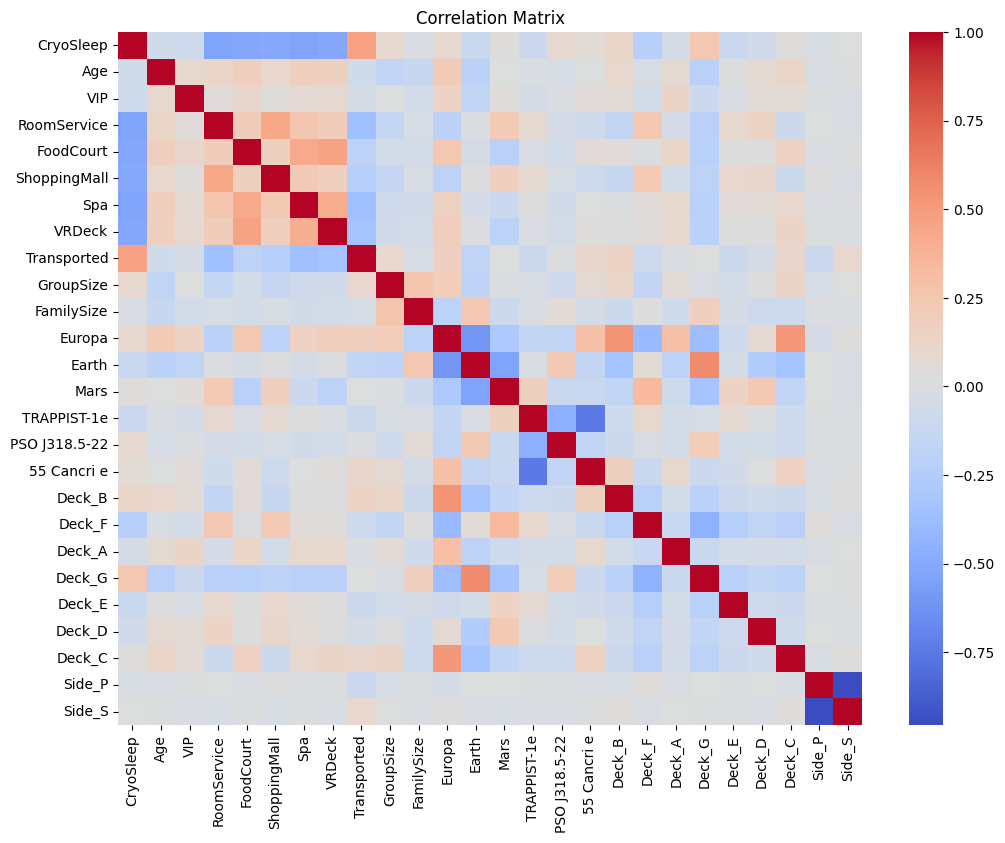

In [106]:
correlation_df = df_train.copy()
correlation_df = correlation_df.drop(columns = ["PassengerId", "HomePlanet", "Cabin", "Destination", "Name"])
print(correlation_df.columns)
print()
correlation_matrix = correlation_df.corr()
print(correlation_matrix["Transported"].sort_values(ascending = False).T)

plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', annot_kws={"size": 12})
plt.title('Correlation Matrix')
plt.show()




In [107]:
print(df_train.head())
print(df_train.columns)

for i in df_train.index:
    line = df_train.iloc[i]
    if pd.isna(line["HomePlanet"]):
        for column in ['Europa', 'Earth','Mars']:
            df_train.loc[i,column] = np.nan

    if pd.isna(line["Destination"]):
        for column in ['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e']:
            df_train.loc[i,column] = np.nan

    if pd.isna(line["Cabin"]):
        for column in ['Deck_B','Deck_F', 'Deck_A', 'Deck_G', 'Deck_E', 'Deck_D', 'Deck_C', 'Side_P','Side_S']:
            df_train.loc[i,column] = np.nan
    

print()
null_values_per_column = df_train.isnull().sum()
print(null_values_per_column)

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall  ...  55 Cancri e  Deck_B Deck_F  \
0          0.0        0.0           0.0  ...        False    True  False   
1          2.0        1.0           3.0  ...        False   False   True   
2          2.0        4.0           0.0  ...        False   False  False   
3          0.0        4.0           3.0  ...        False   False  False   
4          2.0        4.0           3.0  ...        False   False   True   

   Deck_A  Deck_G  Deck_E  Deck_D  Deck_C  Side_P  Side_S  
0   False   False   False   False   False    True   Fals

In [124]:
selected_columns = ['CryoSleep', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'GroupSize', 'FamilySize', 'Europa', 'Earth',
       'Mars', 'TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', 'Deck_B',
       'Deck_F', 'Deck_A', 'Deck_G', 'Deck_E', 'Deck_D', 'Deck_C', 'Side_P',
       'Side_S']
df_train_filtered = df_train[selected_columns]
print(df_train_filtered.head())
null_values_per_column = df_train_filtered.isnull().sum()
print(null_values_per_column)

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=20, random_state=23)
imp.fit(df_train_filtered)
df_train_final = pd.DataFrame(imp.transform(df_train_filtered)).astype(int)
df_train_final.columns = selected_columns
null_values_per_column = df_train_final.isnull().sum()
print(null_values_per_column)

  CryoSleep   Age    VIP  RoomService  FoodCourt  ShoppingMall  Spa  VRDeck  \
0     False  39.0  False          0.0        0.0           0.0  0.0     0.0   
1     False  24.0  False          2.0        1.0           3.0  4.0     3.0   
2     False  58.0   True          2.0        4.0           0.0  4.0     3.0   
3     False  33.0  False          0.0        4.0           3.0  4.0     3.0   
4     False  16.0  False          2.0        4.0           3.0  4.0     1.0   

   Transported  GroupSize  ...  55 Cancri e Deck_B Deck_F Deck_A Deck_G  \
0        False          0  ...        False   True  False  False  False   
1         True          0  ...        False  False   True  False  False   
2        False          1  ...        False  False  False   True  False   
3        False          1  ...        False  False  False   True  False   
4         True          0  ...        False  False   True  False  False   

  Deck_E Deck_D Deck_C Side_P Side_S  
0  False  False  False   True  Fals

In [127]:
print("Before")
stats = df_train_filtered.describe()
print(stats)
for column in df_train_filtered.columns:
    min_column = int(df_train_filtered[column].min())
    max_column = int(df_train_filtered[column].max())
    df_train_final[column] = round(df_train_final[column].apply(lambda x: max(x,min_column) if x < min_column else min(x,max_column)))
print("After")
print(df_train_final.describe())
print(df_train_final.dtypes)



Before
               Age  RoomService    FoodCourt  ShoppingMall          Spa  \
count  8514.000000  8512.000000  8510.000000   8485.000000  8510.000000   
mean     28.827930     0.647791     1.246298      0.872717     1.271328   
std      14.489021     0.913359     1.794527      1.302834     1.789370   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%      19.000000     0.000000     0.000000      0.000000     0.000000   
50%      27.000000     0.000000     0.000000      0.000000     0.000000   
75%      38.000000     2.000000     4.000000      3.000000     4.000000   
max      79.000000     2.000000     4.000000      3.000000     4.000000   

            VRDeck    GroupSize   FamilySize  
count  8505.000000  8693.000000  8493.000000  
mean      0.917931     0.536294     0.711056  
std       1.326015     0.653304     0.693905  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000    